### Soft Margin SVM{泛化能力更强}

$min\frac{1}{2}||w||^{2} + C·\sum_{i=1}^{m}δ_{i}$

where

s.t.     $  y^{(i)}(w^Tx^{(i)}+b)>=1-δ_{i}$ {where $δ_{i}>=0$}

    1.对每一个样本都有不同的容错空间，如果只对s.t.函数添加限制条件还不够,我们不能使容错空间太大，

    2.我们要在最小化的目标函数中加上$\sum_{i=1}^{m}δ_{i}$，使我们的优化可以减小我们的容错空间，同时又留存一些容错空间

    3.我们的优化函数，在优化时，两部分的权值是不同的,因此用一个C来平衡目标函数的优化权重

#### 我们称
$min\frac{1}{2}||w||^{2} + C·\sum_{i=1}^{m}δ_{i}$
where{
s.t.     $  y^{(i)}(w^Tx^{(i)}+b)>=1-δ_{i}$ {where $δ_{i}>=0$}
}
是L1正则

#### L2正则：
$min\frac{1}{2}||w||^{2} + C·\sum_{i=1}^{m}δ_{i}^{2}$
where{
s.t.     $  y^{(i)}(w^Tx^{(i)}+b)>=1-δ_{i}$ {where $δ_{i}>=0$}
}


### 实际使用{sklearn}
先做数据标准化处理 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y=iris.target
X = X[y<2,:2]
y = y[y<2] 

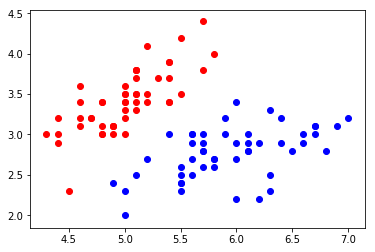

In [2]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='b')
plt.show()

In [3]:
## 归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
from sklearn.svm import LinearSVC
svc = LinearSVC(C =1e9)
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
#绘图函数
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(#meshgrid,用向量生成坐标矩阵
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]#ravel遍历，c_(合并)降维
    y_predict = model.predict(X_new)
    boundary = y_predict.reshape(x0.shape)
    #ListedColormap,生成非渐变的颜色映射
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,boundary,cmap=custom_cmap)

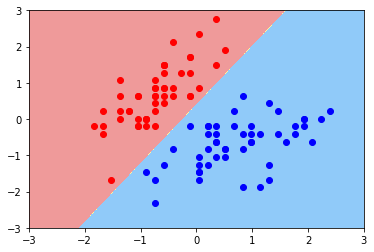

In [5]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='r')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='b')
plt.show()

In [6]:
#绘图函数
def plot_svc_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(#meshgrid,用向量生成坐标矩阵
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]#ravel遍历，c_(合并)降维
    y_predict = model.predict(X_new)
    boundary = y_predict.reshape(x0.shape)
    #ListedColormap,生成非渐变的颜色映射
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,boundary,cmap=custom_cmap)
    ###绘制margin的边界
    w = model.coef_[0]
    b = model.intercept_[0]
    #直线方程：x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0],axis[1],200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    #防止超出我们设置的坐标轴距离
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index],up_y[up_index],color='black')
    plt.plot(plot_x[down_index],down_y[down_index],color='black')

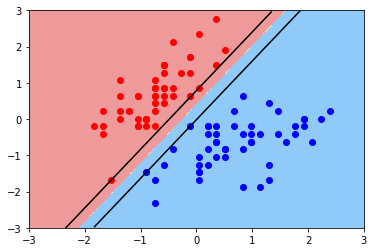

In [7]:
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='r')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='b')
plt.show()

## 多项式引入SVM

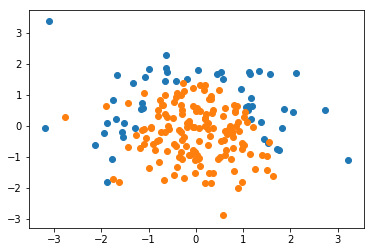

In [8]:
#########
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')#把boolean转化为int
for _ in range(20):#把20个点强制转换为1，添加噪音
    y[np.random.randint(200)] = 1
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [9]:
## 归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
from sklearn.svm import LinearSVC
svc = LinearSVC(C =1e9)
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

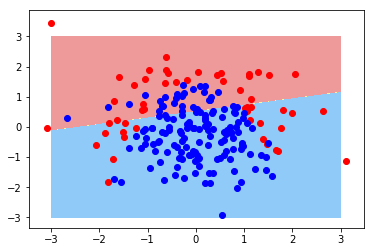

In [10]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='r')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='b')
plt.show()

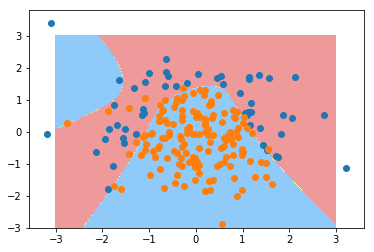

In [11]:
## 使用管道
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

##构造管道
def PloynomialLinearSVC(degree,C =1.0):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('svc',LinearSVC(C =C))
    ])
##使用
svc_pip = PloynomialLinearSVC(degree=3,C =1e9)
svc_pip.fit(X,y)
plot_decision_boundary(svc_pip,[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype='int')

In [13]:
## 归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
from sklearn.svm import LinearSVC
svc = LinearSVC(C =1e9)
svc.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

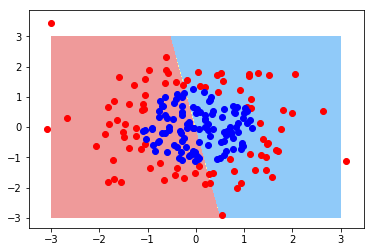

In [14]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='r')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='b')
plt.show()

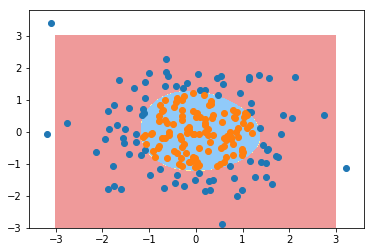

In [15]:

svc_pip = PloynomialLinearSVC(degree=3,C=1e9)
svc_pip.fit(X,y)
plot_decision_boundary(svc_pip,[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

## make moons 数据

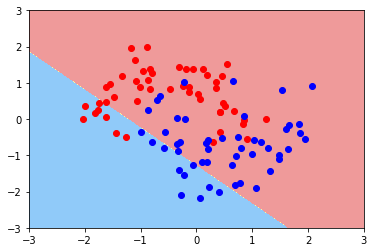

In [16]:
###Sklearn 中的make
X,y = datasets.make_moons(noise=0.25,random_state=666)


## 归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

from sklearn.svm import LinearSVC
svc = LinearSVC(C =1e9)
svc.fit(X_standard,y)


plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='r')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='b')
plt.show()

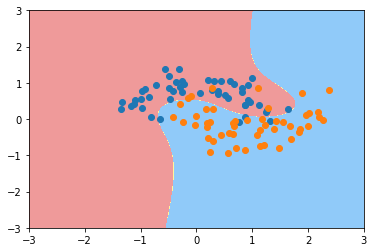

In [17]:
svc_pip = PloynomialLinearSVC(degree=3,C = 1.0)
svc_pip.fit(X,y)
plot_decision_boundary(svc_pip,[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

## 核函数


#### 多项式核

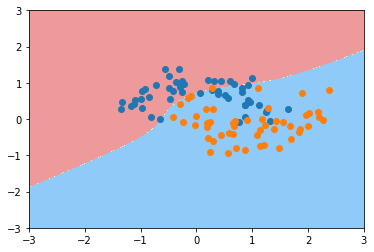

In [18]:
from sklearn.svm import SVC
def PloynomialKernelSVC(degree,C = 1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('KernelSVC',SVC(kernel="poly",degree=degree,C=C))
    ])

svc_pip = PloynomialKernelSVC(degree=3,C = 0.001)
svc_pip.fit(X,y)
plot_decision_boundary(svc_pip,[-3,3,-3,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

#### 高斯核

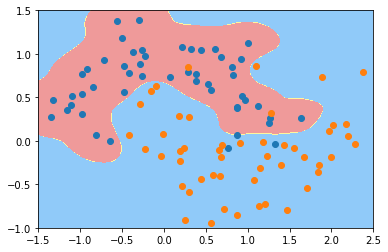

In [19]:
from sklearn.svm import SVC
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('KernelSVC',SVC(kernel="rbf",gamma=gamma))
    ])

svc_rbf = RBFKernelSVC(gamma=11)
svc_rbf.fit(X,y)
plot_decision_boundary(svc_rbf,[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

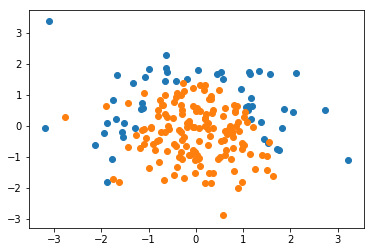

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
#########
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')#把boolean转化为int
for _ in range(20):#把20个点强制转换为1，添加噪音
    y[np.random.randint(200)] = 1
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
## 归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
from sklearn.svm import LinearSVC
svc = LinearSVC(C =1e9)
svc.fit(X_standard,y)

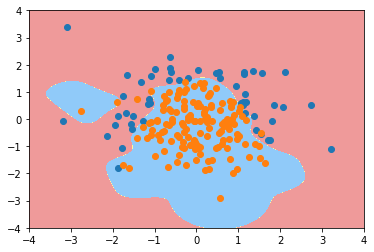

In [21]:
from sklearn.svm import SVC
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('KernelSVC',SVC(kernel="rbf",gamma=gamma))
    ])

svc_rbf = RBFKernelSVC(gamma=4)
svc_rbf.fit(X,y)
plot_decision_boundary(svc_rbf,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

### SVM解决回归
使margin中包含的样本越多越好，中间的中心线就是回归线

In [2]:
#波士顿房价
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [4]:
svr.score(X_test, y_test)

0.6361814878864069

In [ ]:
import padas